# 12.0 RNN and LSTM for Univariate Time Series analysis

Youtube [Lets Implement LSTM RNN Models For Univariate Time Series Forecasting- Deep Learning](https://www.youtube.com/watch?v=UbvkhuqVqUI&ab_channel=KrishNaik)

Github [008-Stock-Price-Prediction-LSTM](https://github.com/prvnktech/008-Stock-Price-Prediction-LSTM)

#### Long Short-Term Memory networks, or LSTMs for short, can be applied to time series forecasting.

There are many types of LSTM models that can be used for each specific type of time series forecasting problem.

#### Univariate LSTM Models
- Data Preparation
- Vanilla LSTM
- Stacked LSTM
- Bidirectional LSTM
- CNN LSTM
- ConvLSTM

#### Multivariate LSTM Models
- Multiple Input Series.
- Multiple Parallel Series.

#### Multi-Step LSTM Models
- Data Preparation
- Vector Output Model
- Encoder-Decoder Model

#### Multivariate Multi-Step LSTM Models
- Multiple Input Multi-Step Output.
- Multiple Parallel Input and Multi-Step Output

### Univariate LSTM Models
LSTMs can be used to model univariate time series forecasting problems.

These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

We will demonstrate a number of variations of the LSTM model for univariate time series forecasting.

Code examples: https://www.kaggle.com/code/ritesh7355/develop-lstm-models-for-time-series-forecasting

### LSTM architectures
Source — http://karpathy.github.io/2015/05/21/rnn-effectiveness/
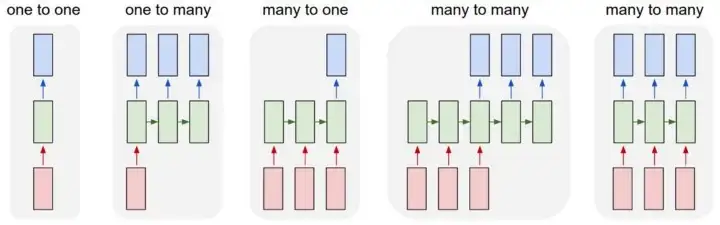

In [34]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

import pandas as pd
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

## 1 Preparing independent and dependen features

In [21]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [26]:
print(X),print(y)

[[[110]
  [125]
  [133]]

 [[125]
  [133]
  [146]]

 [[133]
  [146]
  [158]]

 [[146]
  [158]
  [172]]

 [[158]
  [172]
  [187]]

 [[172]
  [187]
  [196]]]
[146 158 172 187 196 210]


(None, None)

In [27]:
X.shape

(6, 3, 1)

In [28]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

## 2 Building LSTM Model

In [29]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 33201.5039
Epoch 2/300
1/1 [==============================] - 0s 18ms/step - loss: 32453.1621
Epoch 3/300
1/1 [==============================] - 0s 23ms/step - loss: 32012.2285
Epoch 4/300
1/1 [==============================] - 0s 17ms/step - loss: 31649.3984
Epoch 5/300
1/1 [==============================] - 0s 33ms/step - loss: 31233.6035
Epoch 6/300
1/1 [==============================] - 0s 29ms/step - loss: 30792.7910
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 30271.8125
Epoch 8/300
1/1 [==============================] - 0s 15ms/step - loss: 29556.2715
Epoch 9/300
1/1 [==============================] - 0s 19ms/step - loss: 28599.7754
Epoch 10/300
1/1 [==============================] - 0s 15ms/step - loss: 27581.0781
Epoch 11/300
1/1 [==============================] - 0s 18ms/step - loss: 26606.0566
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 25641.4551
Epo

1/1 [==============================] - 0s 29ms/step - loss: 25.1077
Epoch 101/300
1/1 [==============================] - 0s 16ms/step - loss: 24.8600
Epoch 102/300
1/1 [==============================] - 0s 16ms/step - loss: 24.4605
Epoch 103/300
1/1 [==============================] - 0s 19ms/step - loss: 24.3933
Epoch 104/300
1/1 [==============================] - 0s 15ms/step - loss: 24.2988
Epoch 105/300
1/1 [==============================] - 0s 22ms/step - loss: 24.0555
Epoch 106/300
1/1 [==============================] - 0s 21ms/step - loss: 23.7379
Epoch 107/300
1/1 [==============================] - 0s 11ms/step - loss: 23.4798
Epoch 108/300
1/1 [==============================] - 0s 11ms/step - loss: 23.3030
Epoch 109/300
1/1 [==============================] - 0s 11ms/step - loss: 23.1659
Epoch 110/300
1/1 [==============================] - 0s 12ms/step - loss: 23.0418
Epoch 111/300
1/1 [==============================] - 0s 10ms/step - loss: 22.9244
Epoch 112/300
1/1 [===========

1/1 [==============================] - 0s 11ms/step - loss: 4.3092
Epoch 201/300
1/1 [==============================] - 0s 13ms/step - loss: 4.2961
Epoch 202/300
1/1 [==============================] - 0s 10ms/step - loss: 4.2266
Epoch 203/300
1/1 [==============================] - 0s 12ms/step - loss: 4.2079
Epoch 204/300
1/1 [==============================] - 0s 9ms/step - loss: 4.1472
Epoch 205/300
1/1 [==============================] - 0s 12ms/step - loss: 4.1289
Epoch 206/300
1/1 [==============================] - 0s 11ms/step - loss: 4.0710
Epoch 207/300
1/1 [==============================] - 0s 16ms/step - loss: 4.0478
Epoch 208/300
1/1 [==============================] - 0s 15ms/step - loss: 3.9953
Epoch 209/300
1/1 [==============================] - 0s 16ms/step - loss: 3.9676
Epoch 210/300
1/1 [==============================] - 0s 21ms/step - loss: 3.9197
Epoch 211/300
1/1 [==============================] - 0s 9ms/step - loss: 3.8839
Epoch 212/300
1/1 [=========================

## 3 Predicting For the next 10 days

In [35]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.7064]
1 day input [196.         210.         223.70640564]
1 day output [[235.13283]]
2 day input [210.         223.70640564 235.13282776]
2 day output [[249.73312]]
3 day input [223.7064  235.13283 249.73312]
3 day output [[264.11166]]
4 day input [235.13283 249.73312 264.11166]
4 day output [[278.0634]]
5 day input [249.73312 264.11166 278.0634 ]
5 day output [[294.0619]]
6 day input [264.11166 278.0634  294.0619 ]
6 day output [[310.1573]]
7 day input [278.0634 294.0619 310.1573]
7 day output [[326.70096]]
8 day input [294.0619  310.1573  326.70096]
8 day output [[344.7082]]
9 day input [310.1573  326.70096 344.7082 ]
9 day output [[363.17575]]
[223.7064, 235.13283, 249.73312, 264.11166, 278.0634, 294.0619, 310.1573, 326.70096, 344.7082, 363.17575]


In [40]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [41]:
len(timeseries_data)

9

In [42]:
lst_output

[223.7064,
 235.13283,
 249.73312,
 264.11166,
 278.0634,
 294.0619,
 310.1573,
 326.70096,
 344.7082,
 363.17575]

## 4 Visualizaing The Output

In [44]:
import matplotlib.pyplot as plt

In [45]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

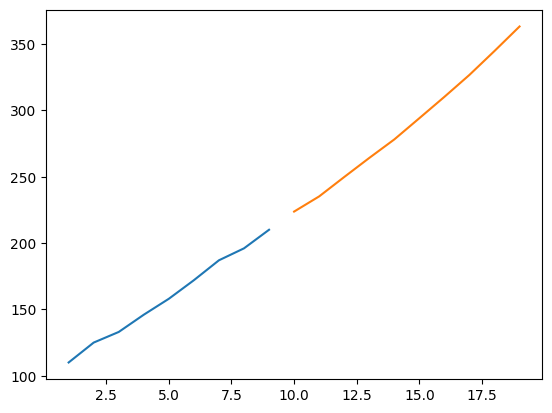

In [47]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output);

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***